<a name="1"></a>
# 1 - Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
df =pd.read_csv('/content/T1.csv')
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [5]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [6]:
#There is negative values in the actual power column
count_negative_values = (df['LV ActivePower (kW)'] < 0).sum()
count_negative_values

57

In [7]:
df.loc[df['LV ActivePower (kW)'] < 0, 'LV ActivePower (kW)'] = 1307.684332

# In Active power LV Describe() min value is negative that is mean that is mean that wind turbine sometimes is consuming power rather than generating it .

## This situation can occur under several conditions:

1- Start-Up Phase: During the initial start-up phase, the turbine may draw power from the grid to initiate the rotation of the blades until the wind speed is sufficient for self-sustained operation.

2- Low Wind Conditions: When wind speeds are too low to generate sufficient power, the turbine may consume power to maintain its systems and control mechanisms.

3- Maintenance or Shutdown: During maintenance or shutdown periods, the turbine might use power for essential operations like braking systems, yaw control, and monitoring equipment.

4- Grid Support: In some cases, wind turbines can provide ancillary services to the grid, such as reactive power support or voltage regulation, which might involve consuming power temporarily.

Negative values in active power readings are a normal part of wind turbine operation under certain conditions and help operators understand the turbine's behavior and energy balance.

<a name="2"></a>
# 2 - Feature Extraction

### Extract new features from the Date/Time Column

In [8]:
#Save a copy for the pipeline and split it
df_copy=df.copy()

In [9]:
df['Date/Time']=pd.to_datetime(df['Date/Time'],format='%d %m %Y %H:%M')

In [10]:
df['Week']=df['Date/Time'].dt.day // 7 + 1

df['Week'].value_counts()

,count
Week,
3,11948
4,11809
2,11645
1,9924
5,5204


In [11]:
df['Month']=df['Date/Time'].dt.month

In [12]:
seasons_dict = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
df['Seasons'] = df['Month'].map(seasons_dict)

In [13]:
df['Day']=df['Date/Time'].dt.day

In [14]:
df['Hour']=df['Date/Time'].dt.hour+1

In [15]:
df.drop(columns=['Date/Time'],inplace=True)

In [16]:
df.isna().sum()

,0
LV ActivePower (kW),0
Wind Speed (m/s),0
Theoretical_Power_Curve (KWh),0
Wind Direction (°),0
Week,0
Month,0
Seasons,0
Day,0
Hour,0


In [22]:
df.tail()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Week,Month,Seasons,Day,Hour
50525,2963.980957,11.404030,3397.190793,80.502724,5,12,Winter,31,24
50526,1684.353027,7.332648,1173.055771,84.062599,5,12,Winter,31,24
50527,2201.106934,8.435358,1788.284755,84.742500,5,12,Winter,31,24
50528,2515.694092,9.421366,2418.382503,84.297913,5,12,Winter,31,24
50529,2820.466064,9.979332,2779.184096,82.274620,5,12,Winter,31,24


### Split The Data

In [17]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
df_copy_train,df_copy_test=train_test_split(df_copy,test_size=0.2,random_state=42)

<a name="3"></a>
# 3 - EDA

In [18]:
#Intialize Numerical and Date Columns
date_col=['Week','Month','Seasons','Hour','Day']
num_col=['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)',]


array([[<Axes: title={'center': 'LV ActivePower (kW)'}>,
        <Axes: title={'center': 'Wind Speed (m/s)'}>],
       [<Axes: title={'center': 'Theoretical_Power_Curve (KWh)'}>,
        <Axes: title={'center': 'Wind Direction (°)'}>]], dtype=object)

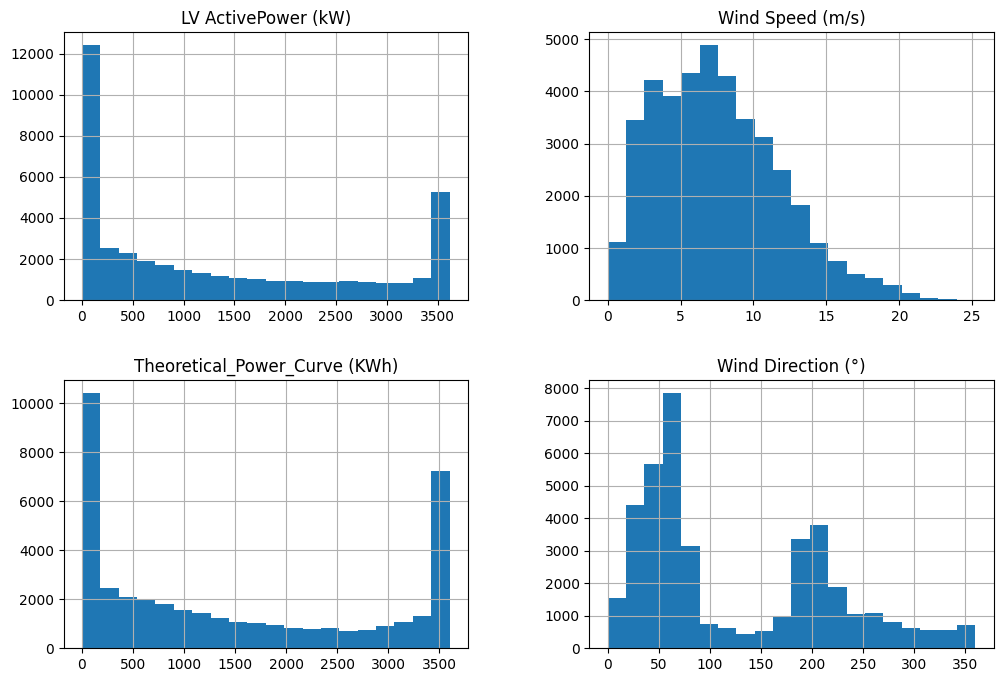

In [19]:
df_train[num_col].hist(bins=20,figsize=(12,8))

<a name="3.1"></a>
### 3.1 - Scatter matrix

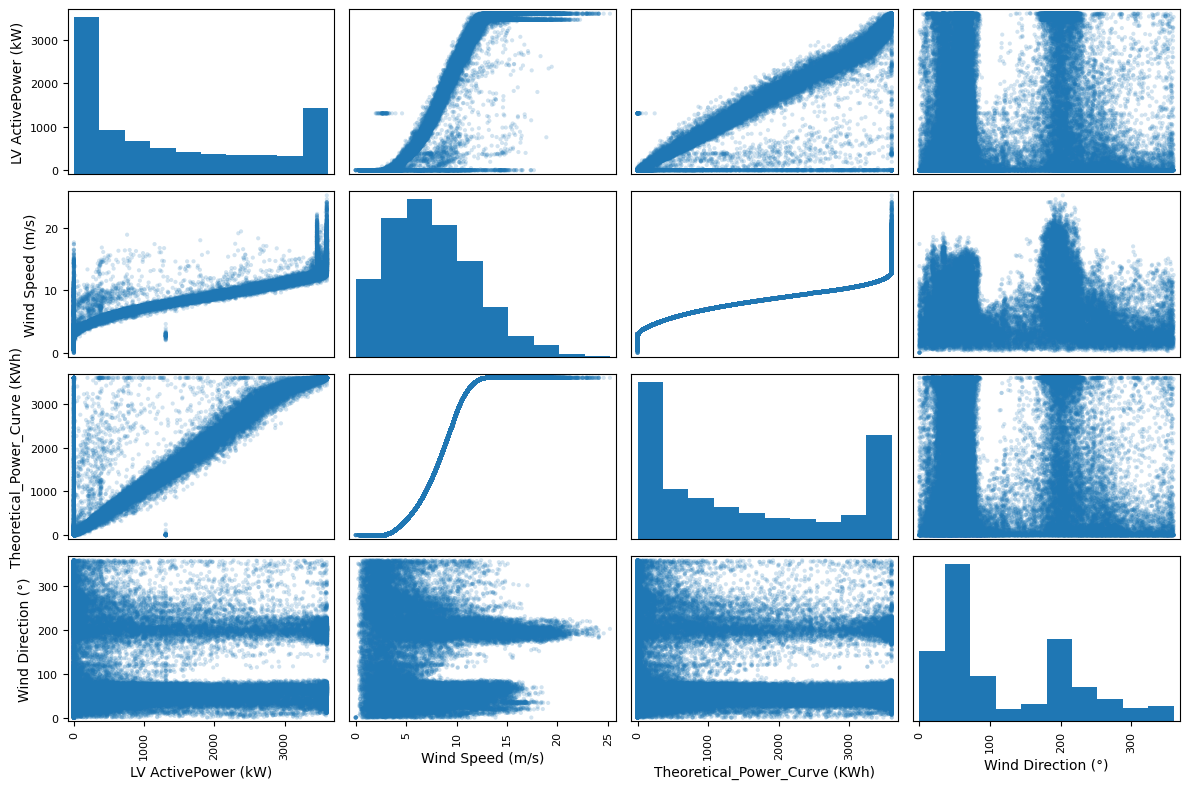

In [20]:
pd.plotting.scatter_matrix(df[num_col], alpha=0.2, figsize=(12, 8))
plt.tight_layout()
plt.show()

- **Comments:**
    - from the scatter plot between `wind speed` and `Theoritical Power Curve`, we see that Wind Turbines Systems can't generate any power if the wind speed is less than 4 m/s
    - when the wind speed is larger than 4 m/s to 11 m/s, the relation between them are linear meaning that increasing the wind speed, allows turbines to generate more power
    - after the wind speed passes 11 m/s, the power generated is saturated on 3600 KWh

<a name="3.2"></a>
### 3.2 - Univariate Analysis

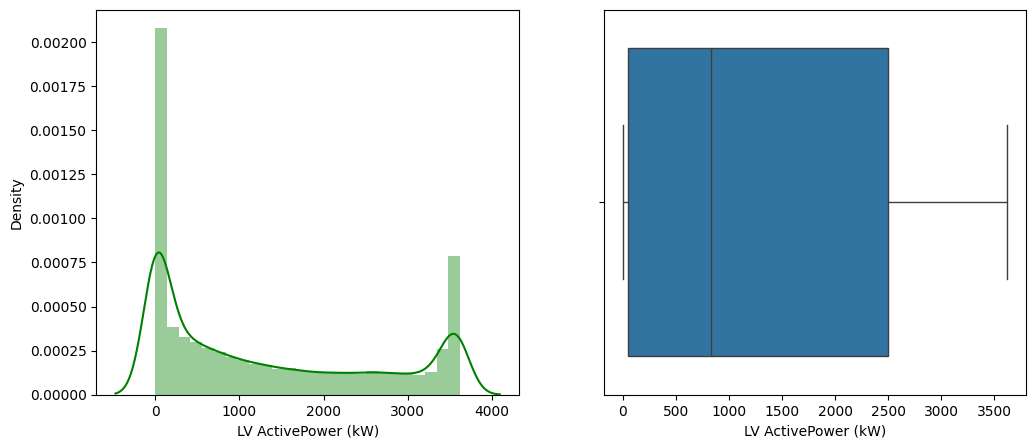

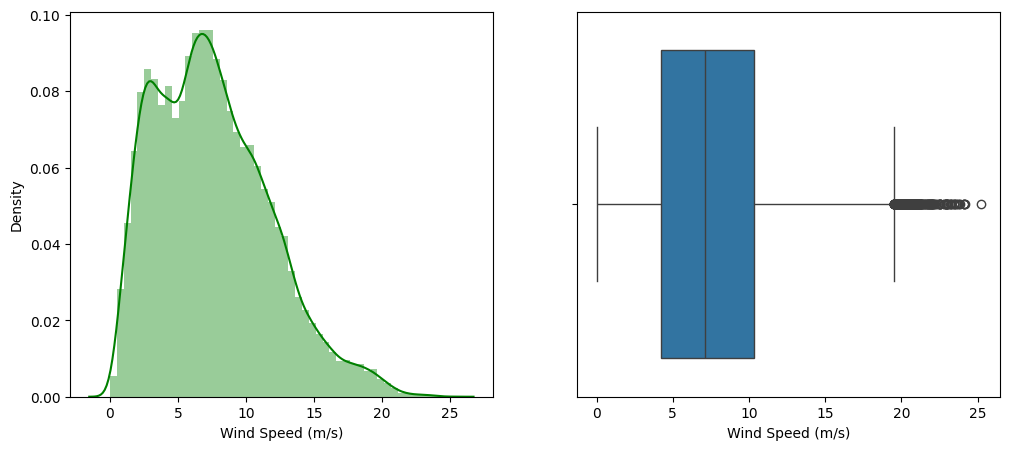

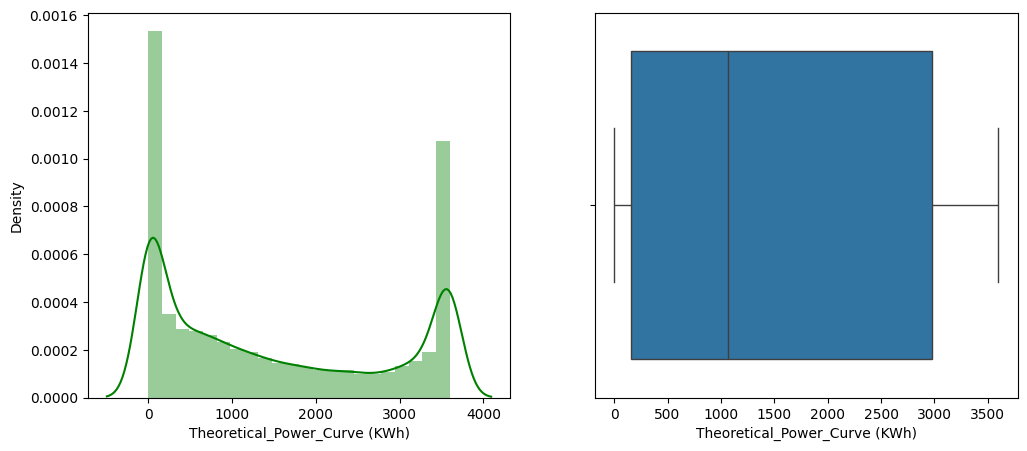

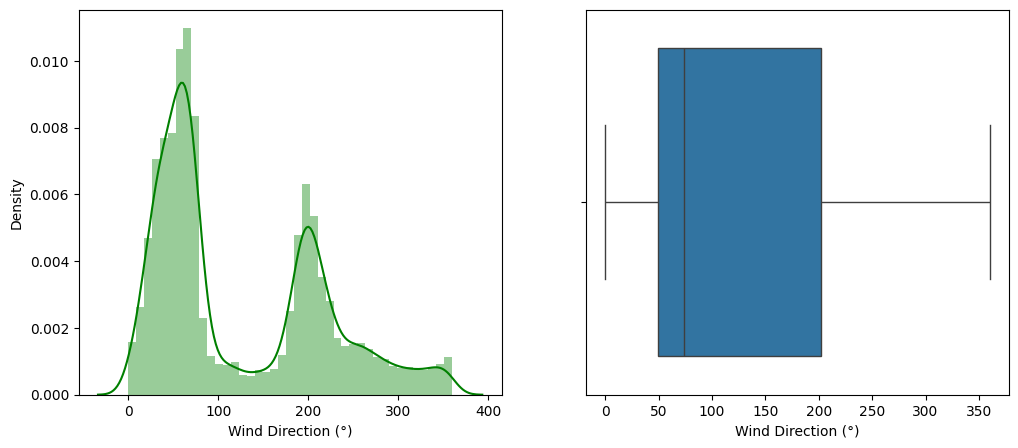

In [23]:
for col in num_col:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.distplot(df_train[col], ax=ax[0] ,color='green')
    sns.boxplot(x=df_train[col], ax=ax[1])
    plt.show()

<a name="3.3"></a>
### 3.3 - Plotting Colinearity

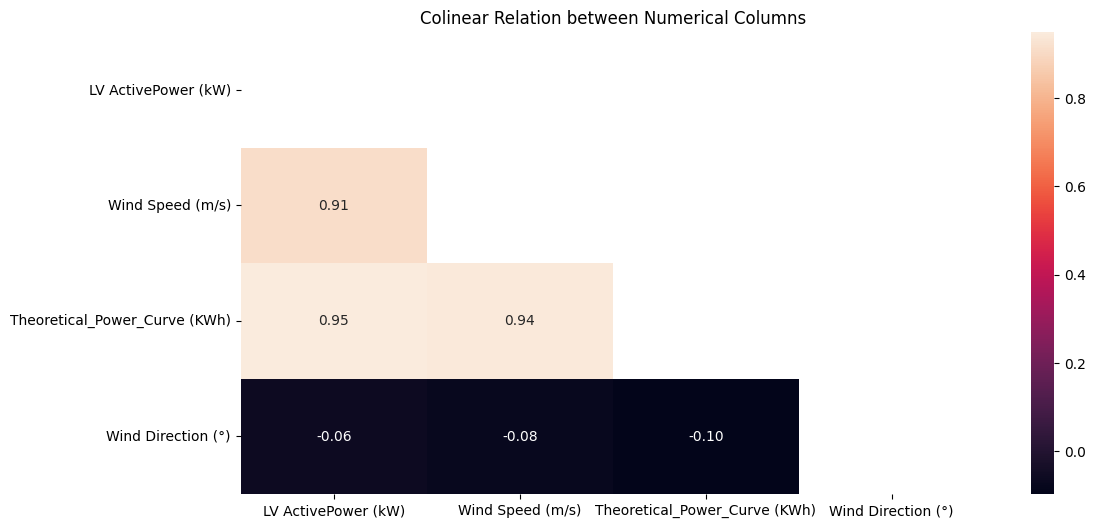

In [24]:
corr = df_train[num_col].corr(numeric_only=True)
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))
plt.title('Colinear Relation between Numerical Columns')
sns.heatmap(corr, annot=True,mask=mask, fmt='.2f')
sns.color_palette("magma", as_cmap=True)
plt.show()

<a name="3.4"></a>
## 3.4 - Numerical Columns over the date columns

<h3>Numerical Columns over the Weeks<h3>

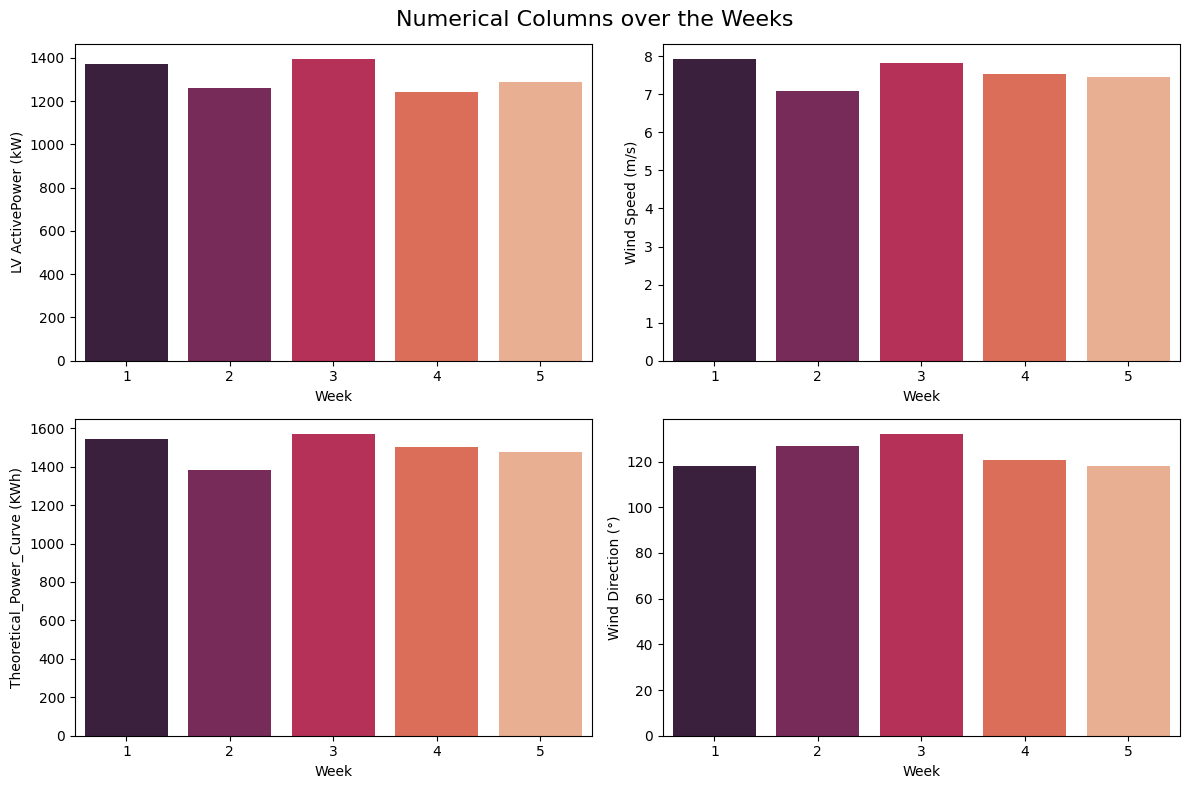

In [25]:
fig,axes=plt.subplots(nrows=len(num_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(df_train[num_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.barplot(x=df_train['Week'],y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
fig.suptitle('Numerical Columns over the Weeks', fontsize=16)
plt.tight_layout()
plt.show()

<h3>Numerical Columns for each Month<h3>

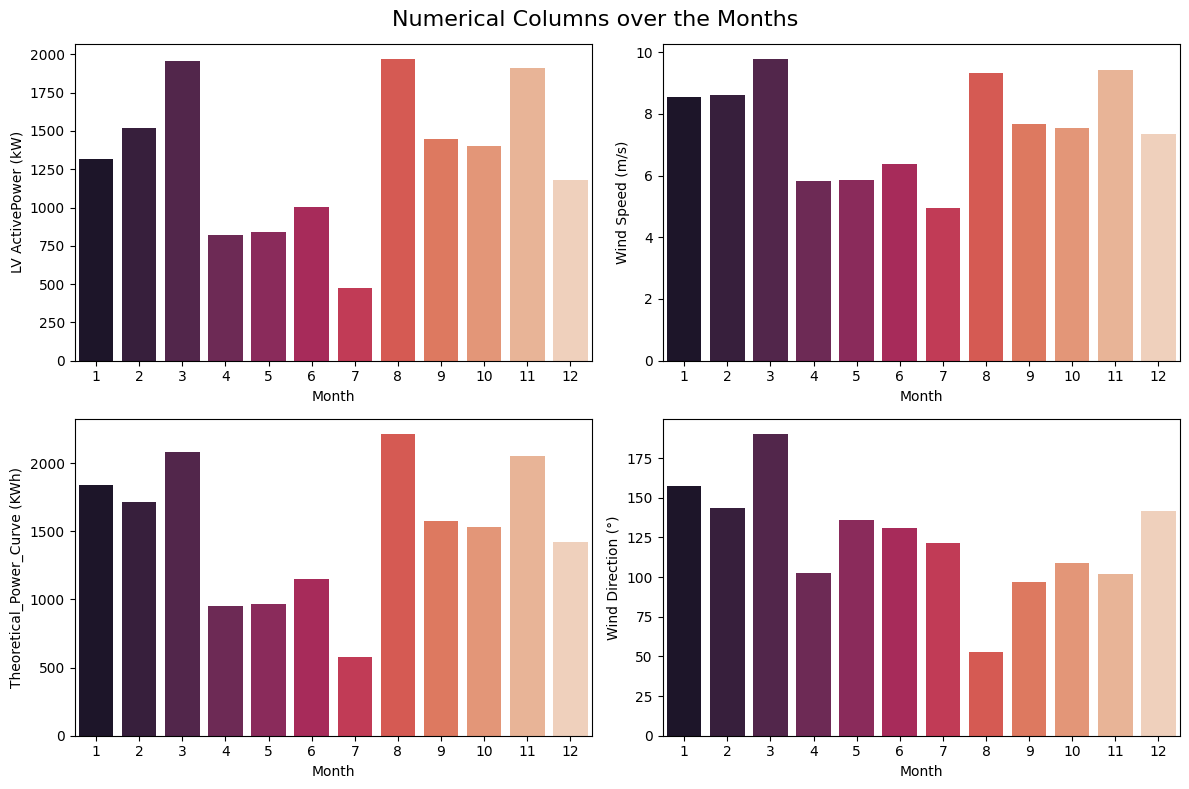

In [26]:
fig,axes=plt.subplots(nrows=len(num_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(df_train[num_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.barplot(x=df_train['Month'],y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
fig.suptitle('Numerical Columns over the Months', fontsize=16)
plt.tight_layout()
plt.show()

<h3>Numerical Columns over the Seasons</h3>

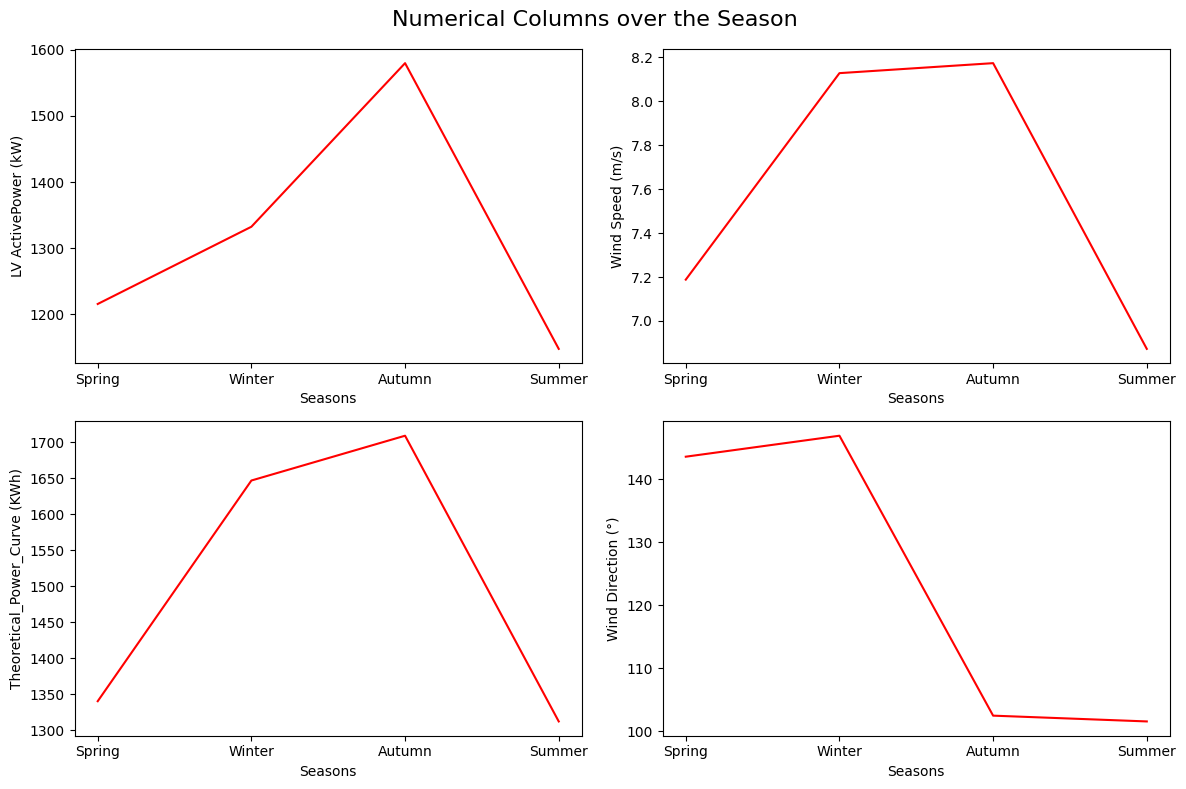

In [27]:
fig,axes=plt.subplots(nrows=len(num_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(df_train[num_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Seasons',y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],ci=None,color='red')
fig.suptitle('Numerical Columns over the Season', fontsize=16)
plt.tight_layout()
plt.show()

<a name="4"></a>
# 4 - Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestRegressor

<h3>Split the Target and Label Columns<h3>

In [ ]:
# X_train,y_train,X_test,y_test=
# df_copy_train.drop(columns='LV ActivePower (kW)'),df_copy_train['LV ActivePower (kW)'],df_copy_test.drop(columns='LV ActivePower (kW)'),df_copy_test['LV ActivePower (kW)']


In [30]:
df_copy_train.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
13791,11 04 2018 06:40,0.000000,2.799033,0.000000,179.881195
46267,02 12 2018 06:40,292.170105,4.963243,327.020704,123.176598
42105,30 10 2018 18:10,3387.934082,12.740750,3592.761778,211.334000
21123,01 06 2018 09:30,1082.370972,7.094672,1059.182279,54.425968
11823,28 03 2018 14:30,550.262329,6.279566,722.431353,42.774040


In [28]:
X_train, y_train, X_test, y_test = (
    df_copy_train.drop(columns='LV ActivePower (kW)'),  # Features for training
    df_copy_train['LV ActivePower (kW)'],               # Target for training
    df_copy_test.drop(columns='LV ActivePower (kW)'),   # Features for testing
    df_copy_test['LV ActivePower (kW)']                 # Target for testing
)


In [29]:
print("The Shape of X_train is :",X_train.shape)
print("The Shape of y_train is :",y_train.shape)
print("The Shape of X_test is :",X_test.shape)
print("The Shape of y_test is :",y_test.shape)

The Shape of X_train is : (40424, 4)
The Shape of y_train is : (40424,)
The Shape of X_test is : (10106, 4)
The Shape of y_test is : (10106,)
